# **SNA: MINI PROJECT**
### **Title: Graph-Based Recommendation System for Tinder: Leveraging Social Interactions for Personalized Matches**

### **This project aims to address this challenge by developing a recommendation system for Tinder that leverages graph representation learning techniques. By modeling the social network of users as a graph and learning embeddings for users based on their interactions and connections, the system aims to generate more personalized and relevant match suggestions**

### **TEAM MEMBERS**
- ### **60009200025 Dhruvi Shah**
- ### **60009200032 Umang Lodaya**
- ### **60009200037 Sharvari Chawade**
- ### **60009200051 Neil Mehta**

### **LIBRARIES**

In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.

In [ ]:
import ast
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import random
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

### **DATA COLLECTION**

In [ ]:
USERS = pd.read_csv("https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/users.csv")
SWIPES = pd.read_csv("https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv")

<ipython-input-3-9140771af8fb>:2: DtypeWarning: Columns (7,9,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  SWIPES = pd.read_csv("https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv")


In [ ]:
USERS.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,is_verified,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,True,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,True,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,True,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,True,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,False,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN


In [ ]:
SWIPES.head()

,id,first_like_unlike_at,first_msg,first_type,is_unmatch,like_count,p1,p1_extend_at,p2,p2_extend_at,second_like_unlike_at,second_msg,second_type,unmatch_on
0,0,2023-02-07T06:12:59.013Z,NaN,DISLIKE,False,2,2,NaN,0,NaN,2023-02-07T11:15:48.194Z,NaN,DISLIKE,NaN
1,1,2023-02-07T06:13:04.999Z,NaN,DISLIKE,False,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2,2023-02-07T06:13:10.206Z,NaN,DISLIKE,False,2,2,NaN,3,NaN,2023-02-07T11:58:49.136Z,NaN,LIKE,NaN
3,3,2023-02-07T07:10:01.566Z,NaN,DISLIKE,False,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,2023-02-07T07:10:04.391Z,NaN,DISLIKE,False,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
USERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1403 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1403 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [ ]:
SWIPES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     66622 non-null  int64 
 1   first_like_unlike_at   66622 non-null  object
 2   first_msg              169 non-null    object
 3   first_type             66622 non-null  object
 4   is_unmatch             66622 non-null  bool  
 5   like_count             66622 non-null  int64 
 6   p1                     66622 non-null  int64 
 7   p1_extend_at           102 non-null    object
 8   p2                     66622 non-null  int64 
 9   p2_extend_at           151 non-null    object
 10  second_like_unlike_at  4730 non-null   object
 11  second_msg             26 non-null     object
 12  second_type            4730 non-null   object
 13  unmatch_on             147 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 6.7+ MB


### **DATA PREPROCESSING**

**USERS DATA**

In [ ]:
USERS.drop(columns=['height', 'is_subscribed', 'what_to_find', 'face_detection_probabilities', 'createdAt', 'dob', 'email',
                       'insta_username', 'is_habit_drink', 'is_habit_smoke', 'is_verified',
                       'mobile', 'status', 'type', 'updatedAt', 'verified_at', 'who_to_date'], inplace=True)

In [ ]:
USERS.shape

(1405, 7)

In [ ]:
USERS.dropna(inplace = True)
USERS.reset_index(inplace = True, drop = True)
USERS.shape

(1076, 7)

In [ ]:
USERS['bio'] = USERS['bio'].str.replace(r'[^\w\s]', '').str.strip()

interests = []

for i in range(len(USERS)):
    try:
        USERS.loc[i, "college"] = ast.literal_eval(USERS.loc[i, "college"])[0]
    except Exception as e:
        USERS.loc[i, "college"] = None

    interests.append(ast.literal_eval(USERS.loc[i, "interests"]))

USERS["interests"] = interests

In [ ]:
USERS = USERS.dropna().reset_index(drop = True)

In [ ]:
USERS.head()

,_id,bio,college,country,gender,interests,name
0,0,I am very honest and caring person,Jawaharlal Nehru University,IN,M,"[Art & Craft, Bollywood, Comedy, Design, Badmi...",Prakhar Sharma
1,1,Let's go on a date.,Heritage,IN,M,"[Singing, Writing, Dancing, Mountains, Biryani]",Amit
2,2,Loving life,Jawaharlal Nehru University,IN,F,"[Badminton, Design, Writing, Open-Minded, Coffee]",Ritz
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,Jawaharlal Nehru University,IN,M,"[Singing, Cricket, Concerts, Vegetarian, Tea]",Devesh Shukla
4,4,🙄,Jawaharlal Nehru University,IN,M,"[Football, Gym, Biryani, Sci-fi, Cricket]",Aditya bhadoriya


**SWIPES DATA**

In [ ]:
SWIPES.columns

Index(['id', 'first_like_unlike_at', 'first_msg', 'first_type', 'is_unmatch',
       'like_count', 'p1', 'p1_extend_at', 'p2', 'p2_extend_at',
       'second_like_unlike_at', 'second_msg', 'second_type', 'unmatch_on'],
      dtype='object')

In [ ]:
SWIPES.drop(columns=['id', 'p1_extend_at', 'p2_extend_at', 'first_like_unlike_at',
                     'first_msg', 'is_unmatch', 'second_like_unlike_at', 'second_msg', 'unmatch_on'], inplace=True)
SWIPES = SWIPES[SWIPES.like_count == 2].reset_index(drop = True)
SWIPES.drop(columns = ['like_count'], inplace = True)

In [ ]:
SWIPES.head()

,first_type,p1,p2,second_type
0,DISLIKE,2,0,DISLIKE
1,DISLIKE,2,3,LIKE
2,DISLIKE,4,2,DISLIKE
3,DISLIKE,6,2,DISLIKE
4,DISLIKE,8,2,DISLIKE


In [ ]:
SWIPES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   first_type   4730 non-null   object
 1   p1           4730 non-null   int64 
 2   p2           4730 non-null   int64 
 3   second_type  4730 non-null   object
dtypes: int64(2), object(2)
memory usage: 147.9+ KB


In [ ]:
users_ids = set(USERS["_id"])
SWIPES["is_p1"] = SWIPES["p1"].apply(lambda x: True if x in users_ids else False)
SWIPES["is_p2"] = SWIPES["p2"].apply(lambda x: True if x in users_ids else False)

In [ ]:
SWIPES = SWIPES[(SWIPES["is_p1"]) & (SWIPES["is_p2"])].reset_index(drop = True)
SWIPES.drop(columns = ["is_p1", "is_p2"], inplace = True)
SWIPES

,first_type,p1,p2,second_type
0,DISLIKE,2,0,DISLIKE
1,DISLIKE,2,3,LIKE
2,DISLIKE,4,2,DISLIKE
3,DISLIKE,6,2,DISLIKE
4,DISLIKE,8,2,DISLIKE
...,...,...,...,...
4182,LIKE,899,1375,DISLIKE
4183,DISLIKE,1391,1238,DISLIKE
4184,LIKE,1291,1207,DISLIKE
4185,LIKE,1400,1210,DISLIKE


### **GRAPH CONSTRUCTION**

In [ ]:
G = nx.DiGraph()

for index, row in USERS.iterrows():
    user_id = row['_id']
    user_attributes = row.drop('_id').to_dict()
    G.add_node(user_id, **user_attributes)

for index, row in SWIPES.iterrows():
    p1 = row['p1']
    p2 = row['p2']
    G.add_edge(p1, p2, interaction_type=row['first_type'])
    G.add_edge(p2, p1, interaction_type=row['second_type'])

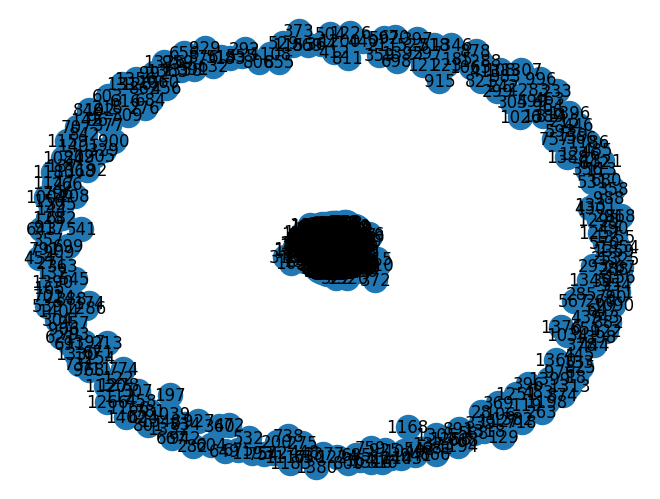

In [ ]:
nx.draw(G, with_labels = True)
plt.show()

### **GRAPH REPRESENTATION LEARNING**

In [ ]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/1073 [00:00<?, ?it/s]

In [ ]:
node_embeddings = {}
for node in G.nodes():
    try:
        node_embeddings[node] = model.wv[node]
    except Exception as e:
        continue

In [ ]:
users = list(node_embeddings.keys())

In [ ]:
def recommend_similar_users(user_id, k=5):
    user_embedding = node_embeddings[user_id]
    similarities = {}
    for other_user_id in users:
        if other_user_id != user_id:
            other_user_embedding = node_embeddings[other_user_id]
            similarity = cosine_similarity([user_embedding], [other_user_embedding])[0][0]
            similarities[other_user_id] = similarity

    top_similar_users = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:k]
    return top_similar_users

In [ ]:
user_id = random.choice(users)
top_similar_users = recommend_similar_users(user_id)
print(f"Top 5 similar users for user {user_id}:")
for i in top_similar_users:
    print(f"{i}")

Top 5 similar users for user 899:
(948, 0.41597772)
(825, 0.3453051)
(1048, 0.30573654)
(839, 0.2963992)
(870, 0.28964877)


In [ ]:
USERS[USERS["_id"] == user_id].reset_index(drop = True)

,_id,bio,college,country,gender,interests,name
0,899,H,JNU,IN,M,"[Writing, Cafe-hopping, Cooking, Classical, Mo...",Pankaj


In [ ]:
RECOMMENDATIONS = pd.DataFrame(columns = USERS.columns)

for i, s in top_similar_users:
    RECOMMENDATIONS = pd.concat([RECOMMENDATIONS, USERS[USERS["_id"] == i]])

RECOMMENDATIONS.reset_index(drop = True)

,_id,bio,college,country,gender,interests,name
0,948,"RESOURCEFUL, RESPONSIBLE, and ENERGETIC.\nGym ...",Hindu college,IN,M,"[Photography, Singing, Gym, Clubs, Beer]",Param
1,825,Kolkata | \nScorpio |,Bhawanipur education society college,IN,M,[],Kashyap Ladha
2,1048,..,SGTB Khalsa College,IN,M,[Photography],Arshdeep Malik
3,839,Senses are most important thing. Looking for a...,JNU,IN,M,"[Dancing, Cricket, Tea, Open-Minded, Romantic]",Gaurav Kant
4,870,Iam a sports man,"JNU,SOE",IN,M,"[Cricket, Biryani, Video Games, Romance, Cycling]",Sachin Naik
